In [1]:
!wget https://www.dropbox.com/scl/fi/wcjscs88qzzhv8vzldz7w/breast-cancer-wisconsin-diagnostic.zip?rlkey=1n8n08no5y4dj8xkudiwkexb2&st=if8zjthh&dl=0

--2025-07-13 16:57:33--  https://www.dropbox.com/scl/fi/wcjscs88qzzhv8vzldz7w/breast-cancer-wisconsin-diagnostic.zip?rlkey=1n8n08no5y4dj8xkudiwkexb2
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc10cfa92e403588aec7f7fdeea6.dl.dropboxusercontent.com/cd/0/inline/CtbO_IPrSxa0YEkJIC6etw8kI1d_COwg_bG46jjUJYFTlEr8Aa6jZlyKoWq00r7DWcdycBBpY6uXerfdgJUqSnRSIxZlSZwtRnjBw4yqL5_ZHplkoWezao93nx9gsXDwvCTnAtrdDAIdGVrHqGWbBV7k/file# [following]
--2025-07-13 16:57:33--  https://uc10cfa92e403588aec7f7fdeea6.dl.dropboxusercontent.com/cd/0/inline/CtbO_IPrSxa0YEkJIC6etw8kI1d_COwg_bG46jjUJYFTlEr8Aa6jZlyKoWq00r7DWcdycBBpY6uXerfdgJUqSnRSIxZlSZwtRnjBw4yqL5_ZHplkoWezao93nx9gsXDwvCTnAtrdDAIdGVrHqGWbBV7k/file
Resolving uc10cfa92e403588aec7f7fdeea6.dl.dropboxusercontent.com (uc10cfa92e403588aec7f7fdeea6.dl.dropboxusercontent.co

In [2]:
!unzip /content/breast-cancer-wisconsin-diagnostic.zip?rlkey=1n8n08no5y4dj8xkudiwkexb2

Archive:  /content/breast-cancer-wisconsin-diagnostic.zip?rlkey=1n8n08no5y4dj8xkudiwkexb2
  inflating: wdbc.data               
  inflating: wdbc.names              


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [4]:
column_names = [
    'id', 'diagnosis',  # diagnosis is the target
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

In [5]:
df=pd.read_csv('/content/wdbc.data',names=column_names)
df.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


In [6]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

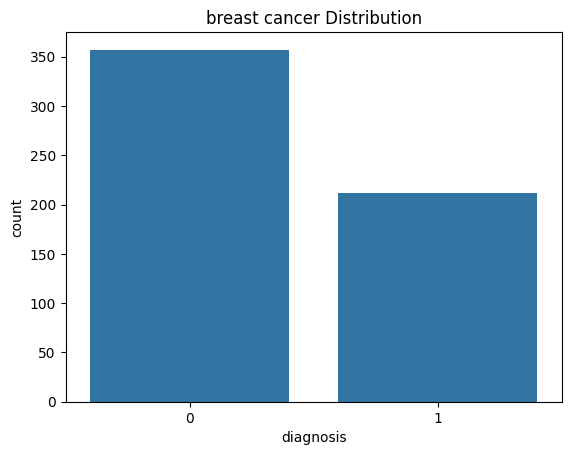

In [7]:
sns.countplot(x='diagnosis', data=df)
plt.title('breast cancer Distribution')
plt.show()

In [8]:
X = df.drop('diagnosis', axis=1) #droping diagnosis or which is also target , we dont want this in x , axis=1 means dropping coloumn
y = df['diagnosis']

In [9]:
scalar=StandardScaler()  #this is used for feature engineering to make all the values in a certain range , this is required in logistic regression
X_scaled=scalar.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
def sigmoid(z):
  return 1/(1+np.exp(-z)) # sigmoid function

def initialize_params(n_features):
  W=np.zeros((n_features,1)) #w is weight starting with 0
  b=0
  return W, b

def propagate(W,b,X,y): # forward and backward propagataion
  m=X.shape[0] #brings all the features in
  A=sigmoid(np.dot(X,W)+b) # applying the sigmoid function , the value will be bw 0 and 1
  y_reshaped = y.values.reshape(-1, 1) # Reshape y to match the shape of A
  cost = -1/m * np.sum(y_reshaped*np.log(A) + (1 - y_reshaped)*np.log(1 - A))  # Cross-entropy loss , loss bw predicted value and actual value

  dW = (1/m) * np.dot(X.T, (A - y_reshaped)) # updating w
  db = (1/m) * np.sum(A - y_reshaped) #updating b
  return cost, dW, db

def gradient_descent(X, y, learning_rate=0.01, epochs=100):
  W,b=initialize_params(X.shape[1])
  costs=[]

  for epoch in range(epochs):
    cost, dW, db = propagate(W,b,X,y)
    W -= learning_rate * dW
    b -= learning_rate * db
    if epoch % 10 == 0: # Reduced print frequency
      print(f"Iteration {epoch}: Cost = {cost:.4f}")


  return W,b

In [12]:
def predict(X, W, b):
    A = sigmoid(np.dot(X, W) + b)
    y_pred = (A > 0.5).astype(int)
    return y_pred, A # Return both binary predictions and probabilities

W, b = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=100)
y_pred, y_proba = predict(X_test, W, b) # Get both y_pred and y_proba

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Iteration 0: Cost = 0.6931
Iteration 10: Cost = 0.5443
Iteration 20: Cost = 0.4582
Iteration 30: Cost = 0.4024
Iteration 40: Cost = 0.3630
Iteration 50: Cost = 0.3335
Iteration 60: Cost = 0.3104
Iteration 70: Cost = 0.2918
Iteration 80: Cost = 0.2764
Iteration 90: Cost = 0.2634
Test Accuracy: 0.97


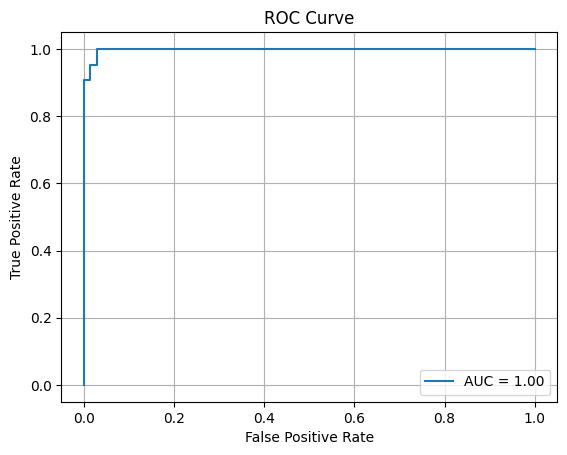

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [14]:
# Step 1: Prepare new data
# Create a DataFrame with the new patient's data
# Make sure the column names and order match the training data (excluding 'id' and 'diagnosis')
new_patient_data = {
    'id': [999999], # You can put a dummy ID here or remove the column if you dropped it from X
    'radius_mean': [15.0],
    'texture_mean': [14.0],
    'perimeter_mean': [100.0],
    'area_mean': [700.0],
    'smoothness_mean': [0.1],
    'compactness_mean': [0.1],
    'concavity_mean': [0.05],
    'concave_points_mean': [0.05],
    'symmetry_mean': [0.15],
    'fractal_dimension_mean': [0.06],
    'radius_se': [0.3],
    'texture_se': [0.4],
    'perimeter_se': [2.0],
    'area_se': [30.0],
    'smoothness_se': [0.005],
    'compactness_se': [0.02],
    'concavity_se': [0.03],
    'concave_points_se': [0.01],
    'symmetry_se': [0.02],
    'fractal_dimension_se': [0.005],
    'radius_worst': [17.0],
    'texture_worst': [18.0],
    'perimeter_worst': [115.0],
    'area_worst': [900.0],
    'smoothness_worst': [0.13],
    'compactness_worst': [0.2],
    'concavity_worst': [0.2],
    'concave_points_worst': [0.1],
    'symmetry_worst': [0.25],
    'fractal_dimension_worst': [0.08]
}

new_patient_df = pd.DataFrame(new_patient_data)

# If you dropped the 'id' column from X during training, you should also drop it from the new data
if 'id' in new_patient_df.columns and 'id' not in X.columns:
    new_patient_df = new_patient_df.drop('id', axis=1)

display(new_patient_df)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,999999,15.0,14.0,100.0,700.0,0.1,0.1,0.05,0.05,0.15,...,17.0,18.0,115.0,900.0,0.13,0.2,0.2,0.1,0.25,0.08


In [15]:
# Step 2: Scale new data
# Use the same scalar fitted on the training data to scale the new data
new_patient_scaled = scalar.transform(new_patient_df)

display(new_patient_scaled)

array([[-0.23514269,  0.24786153, -1.23093671,  0.33079712,  0.12830002,
         0.2590222 , -0.08226807, -0.48712429,  0.02787953, -1.13770198,
        -0.39659031, -0.37958804, -1.48205303, -0.42872583, -0.22743341,
        -0.68035389, -0.30617066, -0.06279   , -0.2913508 , -0.06566072,
         0.45582923,  0.15133802, -1.25018813,  0.23050627,  0.03413317,
        -0.10382943, -0.3452015 , -0.34632595, -0.22240308, -0.64833482,
        -0.21866069]])

In [16]:
# Step 3: Predict diagnosis
# Use the trained predict function with the scaled new data
prediction, probability = predict(new_patient_scaled, W, b)

# Step 4: Display prediction
print(f"The predicted diagnosis is: {prediction[0]}")
print(f"The probability of malignancy is: {probability[0][0]:.4f}")

# Step 5: Finish task
if prediction[0] == 1:
    print("Based on the provided data, the model predicts the tumor is Malignant.")
else:
    print("Based on the provided data, the model predicts the tumor is Benign.")

The predicted diagnosis is: [0]
The probability of malignancy is: 0.3453
Based on the provided data, the model predicts the tumor is Benign.
